In [37]:
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from wordcloud import WordCloud
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')
pd.options.mode.chained_assignment = None  # default='warn'

import gensim
from gensim import corpora
from gensim.models import LdaModel

import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\moad\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\moad\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [38]:
data = pd.read_csv("projet2_data.csv")
data

C:\Users\moad\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

### Data Processing

In [39]:
data.dtypes

id                       object
name                     object
asins                    object
brand                    object
categories               object
keys                     object
manufacturer             object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
dtype: object

In [40]:
data["reviews.text"] = data["reviews.text"].astype('string')

In [41]:
data.dtypes

id                       object
name                     object
asins                    object
brand                    object
categories               object
keys                     object
manufacturer             object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             string
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
dtype: object

### Cleaning :

In [42]:
data.dropna(subset=['reviews.text'],inplace=True)
data.head(5)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [43]:
data= data[['reviews.rating','reviews.text']]
data.head(5)

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


In [44]:
#lower case all text
data["reviews.text"] = data["reviews.text"].str.lower() 

#tokenization of words
data['reviews.text'] = data.apply(lambda row: word_tokenize(row['reviews.text']), axis=1) 

#only alphanumerical values
data["reviews.text"] = data['reviews.text'].apply(lambda x: [item for item in x if item.isalpha()]) 

#lemmatazing words
data['reviews.text'] = data['reviews.text'].apply(lambda x : [WordNetLemmatizer().lemmatize(y) for y in x])

#removing useless words
stop = stopwords.words('english')
data['reviews.text'] = data['reviews.text'].apply(lambda x: [item for item in x if item not in stop])

In [45]:
data["reviews.text"] = data["reviews.text"].apply(lambda x: str(' '.join(x))) #joining all tokens
data["reviews.text"].head(5)

0    product far ha disappointed child love use lik...
1    great beginner experienced person bought gift ...
2    inexpensive tablet use learn step nabi wa thri...
3    fire hd two week love tablet great prime membe...
4    bought grand daughter come visit set user ente...
Name: reviews.text, dtype: object

The funtion Clean_text() that could certainly be applied on the column review.text to do the cleaning, however we already took care of that by aplying the lines above where we applied each question on the column just to make it clear.

In [46]:
def clean_text(text):
    
    lowered = text.lower()
    
    words = nltk.word_tokenize(lowered)
    
    new_words= [word for word in words if word.isalpha()]
    
    cleaned = ' '.join(new_words)
    
    return cleaned

In [47]:
clean_text( "The visual quality on the Fire 8 HD is amazing!!. It runs very fast and is easy to use, very durable.")

'the visual quality on the fire hd is amazing it runs very fast and is easy to use very durable'

### Understanding the data

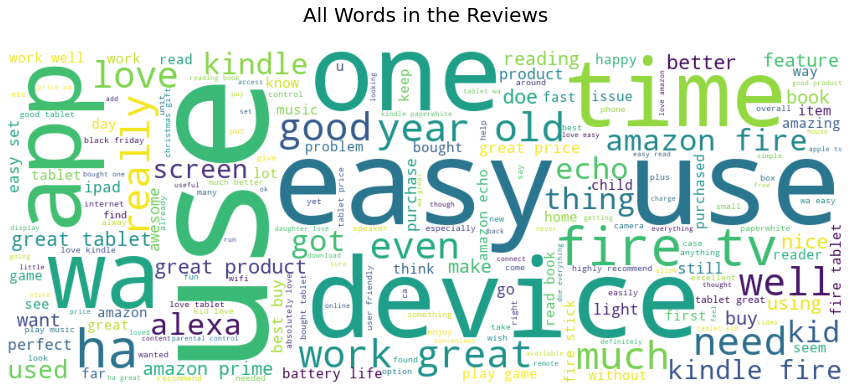

In [48]:
rt = data['reviews.text']
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate(" ".join(rt))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=20)
plt.axis('off')
plt.show()

In [49]:
words = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

rt = " ".join(data['reviews.text'])

In [50]:
diz = {}
for word in rt.split(" "):
    if word in words:
        diz[word] = diz.get(word,0)+1
        

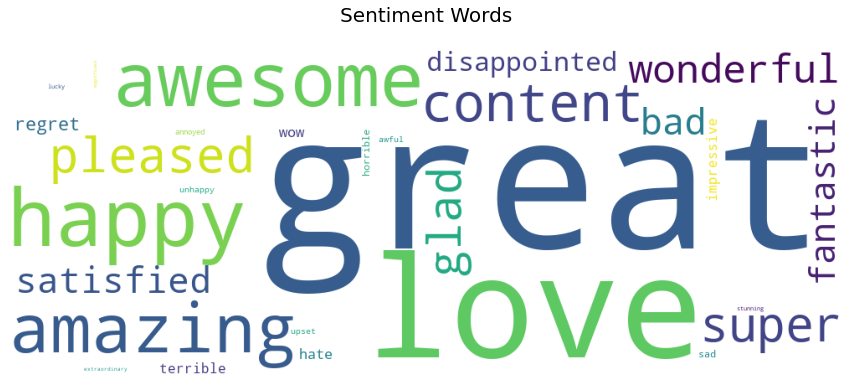

In [51]:
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate_from_frequencies(diz)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title('Sentiment Words\n',size=20)
plt.axis('off')
plt.show()


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(data['reviews.text'])
features = vectorizer.transform(data['reviews.text'])

features.toarray()

array([[0.34340548, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [53]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
tf_idf.head(5)

,ability,able,absolutely,access,account,actually,ad,add,added,adding,...,worry,worth,would,wrong,year,yes,yet,young,youtube,yr
0,0.343405,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.137649,0.0,0.156974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.140249,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Topic modeling

Cleaning has been done on the columns, however we see on the MDF that some noisy words remain, we simply chose to get rid of them in the dictionnary below where words with less occurance will be deleted.

In [54]:
# CREATE DICTIONARY TO COUNT THE WORDS
count_dict = {}
for doc in data['reviews.text']:
    for word in doc.split():
        if word in count_dict.keys():
            count_dict[word] +=1
        else:
            count_dict[word] = 1
            
for key, value in sorted(count_dict.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

laterthis: 1
infact: 1
youand: 1
viedos: 1
manegement: 1
imaging: 1
articulating: 1
canvas: 1
recovery: 1
predominately: 1
offshoot: 1
recycled: 1
downgrading: 1
wev: 1
rood: 1
formated: 1
xfat: 1
werent: 1
coc: 1
wayyyyy: 1
eaxh: 1
bith: 1
strict: 1
gutter: 1
bcuz: 1
lotmore: 1
comfy: 1
abount: 1
acces: 1
reloaded: 1
stalk: 1
zinio: 1
marketamazon: 1
granddaugter: 1
crew: 1
fiancée: 1
ata: 1
frienday: 1
byee: 1
benefiting: 1
voicecast: 1
reaponse: 1
bog: 1
craig: 1
twhat: 1
boggling: 1
netflick: 1
heaviness: 1
carrasoul: 1
pixelating: 1
miro: 1
dizzying: 1
delegating: 1
alleviating: 1
considerate: 1
hasslevery: 1
himsince: 1
preoccupied: 1
stomach: 1
mbr: 1
woudl: 1
menial: 1
grrat: 1
ninety: 1
expectionations: 1
avoids: 1
easyperfect: 1
alwyas: 1
narration: 1
featuers: 1
nana: 1
microtransactions: 1
worksheet: 1
colleague: 1
supportled: 1
isnot: 1
moztly: 1
asstounding: 1
unschooled: 1
prettier: 1
demensions: 1
undergraduate: 1
biology: 1
wishlist: 1
asphalt: 1
playable: 1
dubbles: 1

bednot: 1
corresponding: 1
tidy: 1
toughing: 1
mitigate: 1
catastrophic: 1
tjis: 1
efficacy: 1
humbly: 1
enlarges: 1
resize: 1
seattle: 1
pinging: 1
shud: 1
upcharge: 1
specialty: 1
royce: 1
sticked: 1
pannier: 1
exactlo: 1
cadillac: 1
distinctive: 1
avaiailable: 1
distracts: 1
consult: 1
adverse: 1
disrupts: 1
covering: 1
backlot: 1
tinged: 1
subjective: 1
sued: 1
gradient: 1
visualize: 1
quietly: 1
hards: 1
toldpeople: 1
helium: 1
adjuster: 1
reimagined: 1
bias: 1
adoption: 1
proposition: 1
thhought: 1
easliy: 1
presume: 1
reallllllllllllllllllllllllllllllllllllllllllllllly: 1
flatness: 1
qualify: 1
dominance: 1
hepatic: 1
madman: 1
honesty: 1
whip: 1
qa: 1
facedown: 1
tilted: 1
lid: 1
luddite: 1
ttry: 1
batterry: 1
hep: 1
pending: 1
frustratingwith: 1
studio: 1
tackle: 1
kitty: 1
sulight: 1
stupendous: 1
navigated: 1
vertically: 1
horizontally: 1
flew: 1
bearable: 1
georgia: 1
qualifying: 1
perfected: 1
paris: 1
pol: 1
thelarge: 1
ofmaking: 1
havefound: 1
buyhas: 1
thestore: 1
passi

rolling: 2
personalization: 2
graph: 2
missus: 2
smoothing: 2
begginers: 2
stepson: 2
applied: 2
crispy: 2
passing: 2
durning: 2
bam: 2
prone: 2
existence: 2
mundane: 2
cnbc: 2
wold: 2
unlocked: 2
inevitably: 2
trading: 2
pokémon: 2
triangulation: 2
dinosaur: 2
relation: 2
inlaw: 2
neiece: 2
naught: 2
fri: 2
indefinite: 2
continent: 2
leappad: 2
needy: 2
deff: 2
ny: 2
rite: 2
owe: 2
permanent: 2
procedure: 2
winding: 2
writer: 2
interfacing: 2
twelve: 2
sugar: 2
grandaughters: 2
grafics: 2
caribbean: 2
trivial: 2
friendlier: 2
careless: 2
painfully: 2
sketchy: 2
diy: 2
clunkier: 2
gun: 2
chargeable: 2
dilemma: 2
nuisance: 2
systen: 2
preview: 2
agood: 2
quickness: 2
disaster: 2
lime: 2
alive: 2
ther: 2
ppl: 2
highschool: 2
van: 2
credited: 2
determined: 2
functionally: 2
everthing: 2
googlecast: 2
guided: 2
underestimate: 2
ownership: 2
sea: 2
exiting: 2
servive: 2
combining: 2
kool: 2
moth: 2
dec: 2
auxiliary: 2
persistence: 2
fixing: 2
cried: 2
screensavers: 2
talent: 2
commander: 2


remain: 8
fitbit: 8
interruption: 8
bout: 8
occupy: 8
aux: 8
associated: 8
walked: 8
fav: 8
inclined: 8
mickey: 8
canceling: 8
asap: 8
ect: 8
bough: 8
remarkable: 8
street: 8
checkout: 8
continuous: 8
matte: 8
worker: 8
gui: 8
spotty: 8
intrigued: 8
production: 8
gain: 8
jail: 8
selecting: 8
mix: 8
extend: 8
topic: 8
finished: 8
delight: 8
btw: 8
supposedly: 8
porch: 8
quote: 8
increasing: 8
boom: 8
genius: 8
uber: 8
uverse: 8
iheartradio: 8
insteon: 8
limitless: 8
helper: 8
domino: 8
egg: 8
hp: 9
meeting: 9
handheld: 9
unwanted: 9
recognized: 9
wasnt: 9
pen: 9
virus: 9
lying: 9
ergonomic: 9
flagship: 9
aged: 9
godson: 9
unexpected: 9
surpassed: 9
killer: 9
mediocre: 9
inconvenient: 9
punch: 9
coat: 9
resolve: 9
hi: 9
survived: 9
console: 9
carousel: 9
impaired: 9
crashed: 9
gf: 9
ebay: 9
immensely: 9
fiancé: 9
kindlefire: 9
project: 9
anyways: 9
tote: 9
banking: 9
visuals: 9
jumped: 9
detailed: 9
crush: 9
goodreads: 9
logo: 9
accomplish: 9
equal: 9
technological: 9
cake: 9
proprietary

In [55]:
# REMOVE WORDS THAT OCCUR LESS
low_value = 8 #just a lucky number
bad_words = [key for key in count_dict.keys() if count_dict[key] < low_value]
# CREATE A LIST OF LISTS - EACH DOCUMENT IS A STRING BROKEN INTO A LIST OF WORDS
corpus = [doc.split() for doc in data['reviews.text']]
clean_list = []
for document in corpus:
    clean_list.append([word for word in document if word not in bad_words])
clean_list

[['product',
  'far',
  'ha',
  'disappointed',
  'child',
  'love',
  'use',
  'like',
  'ability',
  'monitor',
  'control',
  'content',
  'see',
  'ease'],
 ['great', 'beginner', 'experienced', 'person', 'bought', 'gift', 'love'],
 ['inexpensive',
  'tablet',
  'use',
  'learn',
  'step',
  'nabi',
  'wa',
  'thrilled',
  'learn',
  'skype',
  'already'],
 ['fire',
  'hd',
  'two',
  'week',
  'love',
  'tablet',
  'great',
  'prime',
  'member',
  'tablet',
  'shine',
  'love',
  'able',
  'easily',
  'access',
  'prime',
  'content',
  'well',
  'movie',
  'download',
  'watch',
  'ha',
  'screen',
  'ha',
  'really',
  'nice',
  'look',
  'nice',
  'crisp',
  'bright',
  'brighter',
  'ipad',
  'pro',
  'base',
  'model',
  'build',
  'fire',
  'awesome',
  'running',
  'thick',
  'smooth',
  'feel',
  'back',
  'really',
  'amazing',
  'hold',
  'like',
  'tab',
  'ur',
  'hand'],
 ['bought',
  'grand',
  'daughter',
  'come',
  'visit',
  'set',
  'user',
  'age',
  'name',
  

In [56]:
corpora_dict = corpora.Dictionary(clean_list)
corpus = [corpora_dict.doc2bow(line) for line in clean_list]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(9, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(13, 1),
  (20, 1),
  (21, 1),
  (22, 2),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1)],
 [(2, 1),
  (7, 2),
  (8, 1),
  (9, 2),
  (18, 1),
  (26, 2),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 2),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1)],
 [(2, 1),
  (9, 1),
  (15, 2),
  (26, 3),
  (30, 1),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 2),
  (77, 1),
  (78, 1),
  (79, 1),
  

In [57]:
# TRAIN THE LDA MODEL 
lda_model = LdaModel(corpus=corpus,
                         id2word=corpora_dict,
                         random_state=100,
                         num_topics=3,
                         passes=5,
                         per_word_topics=True)
# See the topics
lda_model.print_topics(-1)

[(0,
  '0.059*"love" + 0.041*"use" + 0.041*"easy" + 0.026*"great" + 0.021*"bought" + 0.020*"music" + 0.019*"set" + 0.017*"play" + 0.014*"alexa" + 0.012*"movie"'),
 (1,
  '0.035*"tv" + 0.027*"amazon" + 0.025*"fire" + 0.021*"great" + 0.014*"work" + 0.013*"product" + 0.013*"device" + 0.012*"echo" + 0.011*"wa" + 0.011*"would"'),
 (2,
  '0.030*"kindle" + 0.015*"light" + 0.015*"easy" + 0.014*"use" + 0.013*"read" + 0.013*"great" + 0.012*"book" + 0.011*"like" + 0.010*"reading" + 0.010*"screen"')]

In [58]:
from sklearn.decomposition import LatentDirichletAllocation
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)

In [59]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, corpora_dict, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\moad\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [60]:
sentiment = {1: -1,
            2: -1,
            3: 0,
            4: 1,
            5: 1}

data["sentiment"] = data["reviews.rating"].map(sentiment)
data

,reviews.rating,reviews.text,sentiment
0,5.0,product far ha disappointed child love use lik...,1.0
1,5.0,great beginner experienced person bought gift ...,1.0
2,5.0,inexpensive tablet use learn step nabi wa thri...,1.0
3,4.0,fire hd two week love tablet great prime membe...,1.0
4,5.0,bought grand daughter come visit set user ente...,1.0
...,...,...,...
34655,3.0,appreciably faster higher amp charger used kin...,0.0
34656,1.0,amazon include charger kindle fact charging u ...,-1.0
34657,1.0,love kindle fire really disappointed kindle po...,-1.0
34658,1.0,wa surprised find come type charging cord purc...,-1.0


In [61]:
lemmatizer = WordNetLemmatizer()
pos=neg=obj=count=0

postagging = []

for review in data['reviews.text']:
    list = word_tokenize(review)
    postagging.append(nltk.pos_tag(list))

data['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None


# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0
    
    
senti_score = []

for pos_val in data['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
data['senti_score'] = senti_score
print(data['senti_score'])

print(data.head(5))

0        0.500
1        0.875
2        0.000
3        7.125
4        1.125
         ...  
34655    3.250
34656   -0.250
34657    1.000
34658    0.250
34659    1.875
Name: senti_score, Length: 34659, dtype: float64
   reviews.rating                                       reviews.text  \
0             5.0  product far ha disappointed child love use lik...   
1             5.0  great beginner experienced person bought gift ...   
2             5.0  inexpensive tablet use learn step nabi wa thri...   
3             4.0  fire hd two week love tablet great prime membe...   
4             5.0  bought grand daughter come visit set user ente...   

   sentiment                                           pos_tags  senti_score  
0        1.0  [(product, NN), (far, RB), (ha, RB), (disappoi...        0.500  
1        1.0  [(great, JJ), (beginner, NN), (experienced, VB...        0.875  
2        1.0  [(inexpensive, JJ), (tablet, NN), (use, NN), (...        0.000  
3        1.0  [(fire, NN), (hd, NN), 

In [62]:
overall=[]
for i in range(len(data)+1):
    if i == 3111 : continue
    if data['senti_score'][i]>= 0.05:
        overall.append('Positive')
    elif data['senti_score'][i]<= -0.05:
        overall.append('Negative')
    else:
        overall.append('Neutral')
data['Overall Sentiment']=overall
data['Overall Sentiment'].head(5)

0    Positive
1    Positive
2     Neutral
3    Positive
4    Positive
Name: Overall Sentiment, dtype: object

In [63]:
data

,reviews.rating,reviews.text,sentiment,pos_tags,senti_score,Overall Sentiment
0,5.0,product far ha disappointed child love use lik...,1.0,"[(product, NN), (far, RB), (ha, RB), (disappoi...",0.500,Positive
1,5.0,great beginner experienced person bought gift ...,1.0,"[(great, JJ), (beginner, NN), (experienced, VB...",0.875,Positive
2,5.0,inexpensive tablet use learn step nabi wa thri...,1.0,"[(inexpensive, JJ), (tablet, NN), (use, NN), (...",0.000,Neutral
3,4.0,fire hd two week love tablet great prime membe...,1.0,"[(fire, NN), (hd, NN), (two, CD), (week, NN), ...",7.125,Positive
4,5.0,bought grand daughter come visit set user ente...,1.0,"[(bought, VBN), (grand, JJ), (daughter, NN), (...",1.125,Positive
...,...,...,...,...,...,...
34655,3.0,appreciably faster higher amp charger used kin...,0.0,"[(appreciably, RB), (faster, RBR), (higher, JJ...",3.250,Positive
34656,1.0,amazon include charger kindle fact charging u ...,-1.0,"[(amazon, NN), (include, VBP), (charger, JJR),...",-0.250,Negative
34657,1.0,love kindle fire really disappointed kindle po...,-1.0,"[(love, VB), (kindle, NN), (fire, NN), (really...",1.000,Positive
34658,1.0,wa surprised find come type charging cord purc...,-1.0,"[(wa, NNS), (surprised, VBD), (find, VB), (com...",0.250,Positive


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall Sentiment', ylabel='count'>

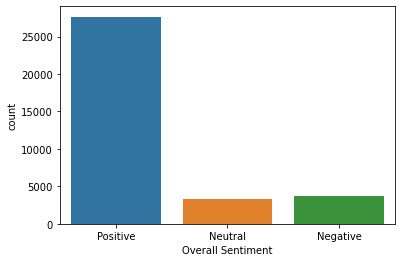

In [64]:
import seaborn as sns
sns.countplot(data['Overall Sentiment'])

## MODEL SENTIMENT

In [65]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(data['reviews.text'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head(10)

,aa,aaa,aamazon,aand,abandon,abandoned,abandoning,abc,abcmouse,abd,...,zinio,zip,zipper,zippy,zone,zoo,zoom,zoomed,zooming,zwave
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
vect = CountVectorizer()
vect.fit(data['reviews.text'])
vect.get_feature_names()
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(data['reviews.text'])
print(simple_train_dtm)

  (0, 10)	1
  (0, 1783)	1
  (0, 2206)	1
  (0, 2229)	1
  (0, 2857)	1
  (0, 3189)	1
  (0, 3762)	1
  (0, 4643)	1
  (0, 6000)	1
  (0, 6157)	1
  (0, 6610)	1
  (0, 7952)	1
  (0, 9048)	1
  (0, 11052)	1
  (1, 1053)	1
  (1, 1318)	1
  (1, 3641)	1
  (1, 4361)	1
  (1, 4556)	1
  (1, 6157)	1
  (1, 7509)	1
  (2, 388)	1
  (2, 5244)	1
  (2, 5886)	2
  (2, 6741)	1
  :	:
  (34658, 4442)	1
  (34658, 4478)	1
  (34658, 4570)	1
  (34658, 4643)	1
  (34658, 5731)	2
  (34658, 5927)	1
  (34658, 6157)	1
  (34658, 6241)	1
  (34658, 6952)	1
  (34658, 7075)	1
  (34658, 7103)	2
  (34658, 7459)	1
  (34658, 7667)	1
  (34658, 7731)	1
  (34658, 8088)	1
  (34658, 8757)	1
  (34658, 8940)	1
  (34658, 9680)	1
  (34658, 9842)	1
  (34658, 10215)	1
  (34658, 10411)	2
  (34658, 10417)	1
  (34658, 11050)	1
  (34658, 11273)	1
  (34658, 11512)	1


In [67]:
### Creating a python object of the class CountVectorizer
bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             ngram_range=(1,3)) # number of n-grams

bow_data = bow_counts.fit_transform(data['reviews.text'])

In [68]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    data['Overall Sentiment'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random

In [69]:
### Training the model 
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bow) # Class prediction

# Print a classification report
print(classification_report(y_test_bow,test_pred_lr_all))

C:\Users\moad\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    Negative       0.76      0.50      0.60       735
     Neutral       0.66      0.51      0.57       678
    Positive       0.90      0.97      0.94      5519

    accuracy                           0.88      6932
   macro avg       0.77      0.66      0.70      6932
weighted avg       0.86      0.88      0.87      6932



In [70]:
data

,reviews.rating,reviews.text,sentiment,pos_tags,senti_score,Overall Sentiment
0,5.0,product far ha disappointed child love use lik...,1.0,"[(product, NN), (far, RB), (ha, RB), (disappoi...",0.500,Positive
1,5.0,great beginner experienced person bought gift ...,1.0,"[(great, JJ), (beginner, NN), (experienced, VB...",0.875,Positive
2,5.0,inexpensive tablet use learn step nabi wa thri...,1.0,"[(inexpensive, JJ), (tablet, NN), (use, NN), (...",0.000,Neutral
3,4.0,fire hd two week love tablet great prime membe...,1.0,"[(fire, NN), (hd, NN), (two, CD), (week, NN), ...",7.125,Positive
4,5.0,bought grand daughter come visit set user ente...,1.0,"[(bought, VBN), (grand, JJ), (daughter, NN), (...",1.125,Positive
...,...,...,...,...,...,...
34655,3.0,appreciably faster higher amp charger used kin...,0.0,"[(appreciably, RB), (faster, RBR), (higher, JJ...",3.250,Positive
34656,1.0,amazon include charger kindle fact charging u ...,-1.0,"[(amazon, NN), (include, VBP), (charger, JJR),...",-0.250,Negative
34657,1.0,love kindle fire really disappointed kindle po...,-1.0,"[(love, VB), (kindle, NN), (fire, NN), (really...",1.000,Positive
34658,1.0,wa surprised find come type charging cord purc...,-1.0,"[(wa, NNS), (surprised, VBD), (find, VB), (com...",0.250,Positive


##### The performane of the model is quiet intresting considering the data set we're working with, the logistic regression model confirms the LDA results.

###### à travers l'evolution du code, on remarque au niveau des visualisations, du WordCloud, LDA model et du modele Logisti Regression etablie pour SentiwordNet que finalement la data est un un peu biaisé pour les reviews positif, pour reduire ce point on a essayé de preciser une tronche pour les avis Neutre, cependant ça n'a pas attenuer l'influance de la partie positif. il est obligatoire donc de faire equilibrer la dataset avec plus d'avis negatif (sorry amazon :p ). 